### Algerian forest fire dataset analysis
#### Juan Sebastian Rodriguez Reyes - C0915840

#### Importing the dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


First we are going to check if there are null values in the data and if the datatypes are aligned with the information. As we can see, there aren't null values and data types are aligned with the information we are seeing in the data.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


We also see that there is a categorical column called 'Classes'. From a broad perspective we can assume it only contains the values fire and not fire, but confirming that we see that there is a problem with the spaces before and after the words. I adress this problem and confirm that everything is right and turn the values to numeric.

In [18]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [19]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [20]:
df['Classes'] = df['Classes'].replace({'fire' : 1, 'not fire' : 0})
df['Classes'].unique()

array([0, 1])

Now we are going to use the describe function to take a look of basic statistics of each colum. We find that the year is 2012 in all the observations, which is not going to be useful for our model. Because of this I droped the year column.

In [21]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [22]:
df.drop('year', axis=1, inplace=True)
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Exploratory data analysis

Now we are going to see some visualizations and exploring the data. First we are going to take a look to the distributions:

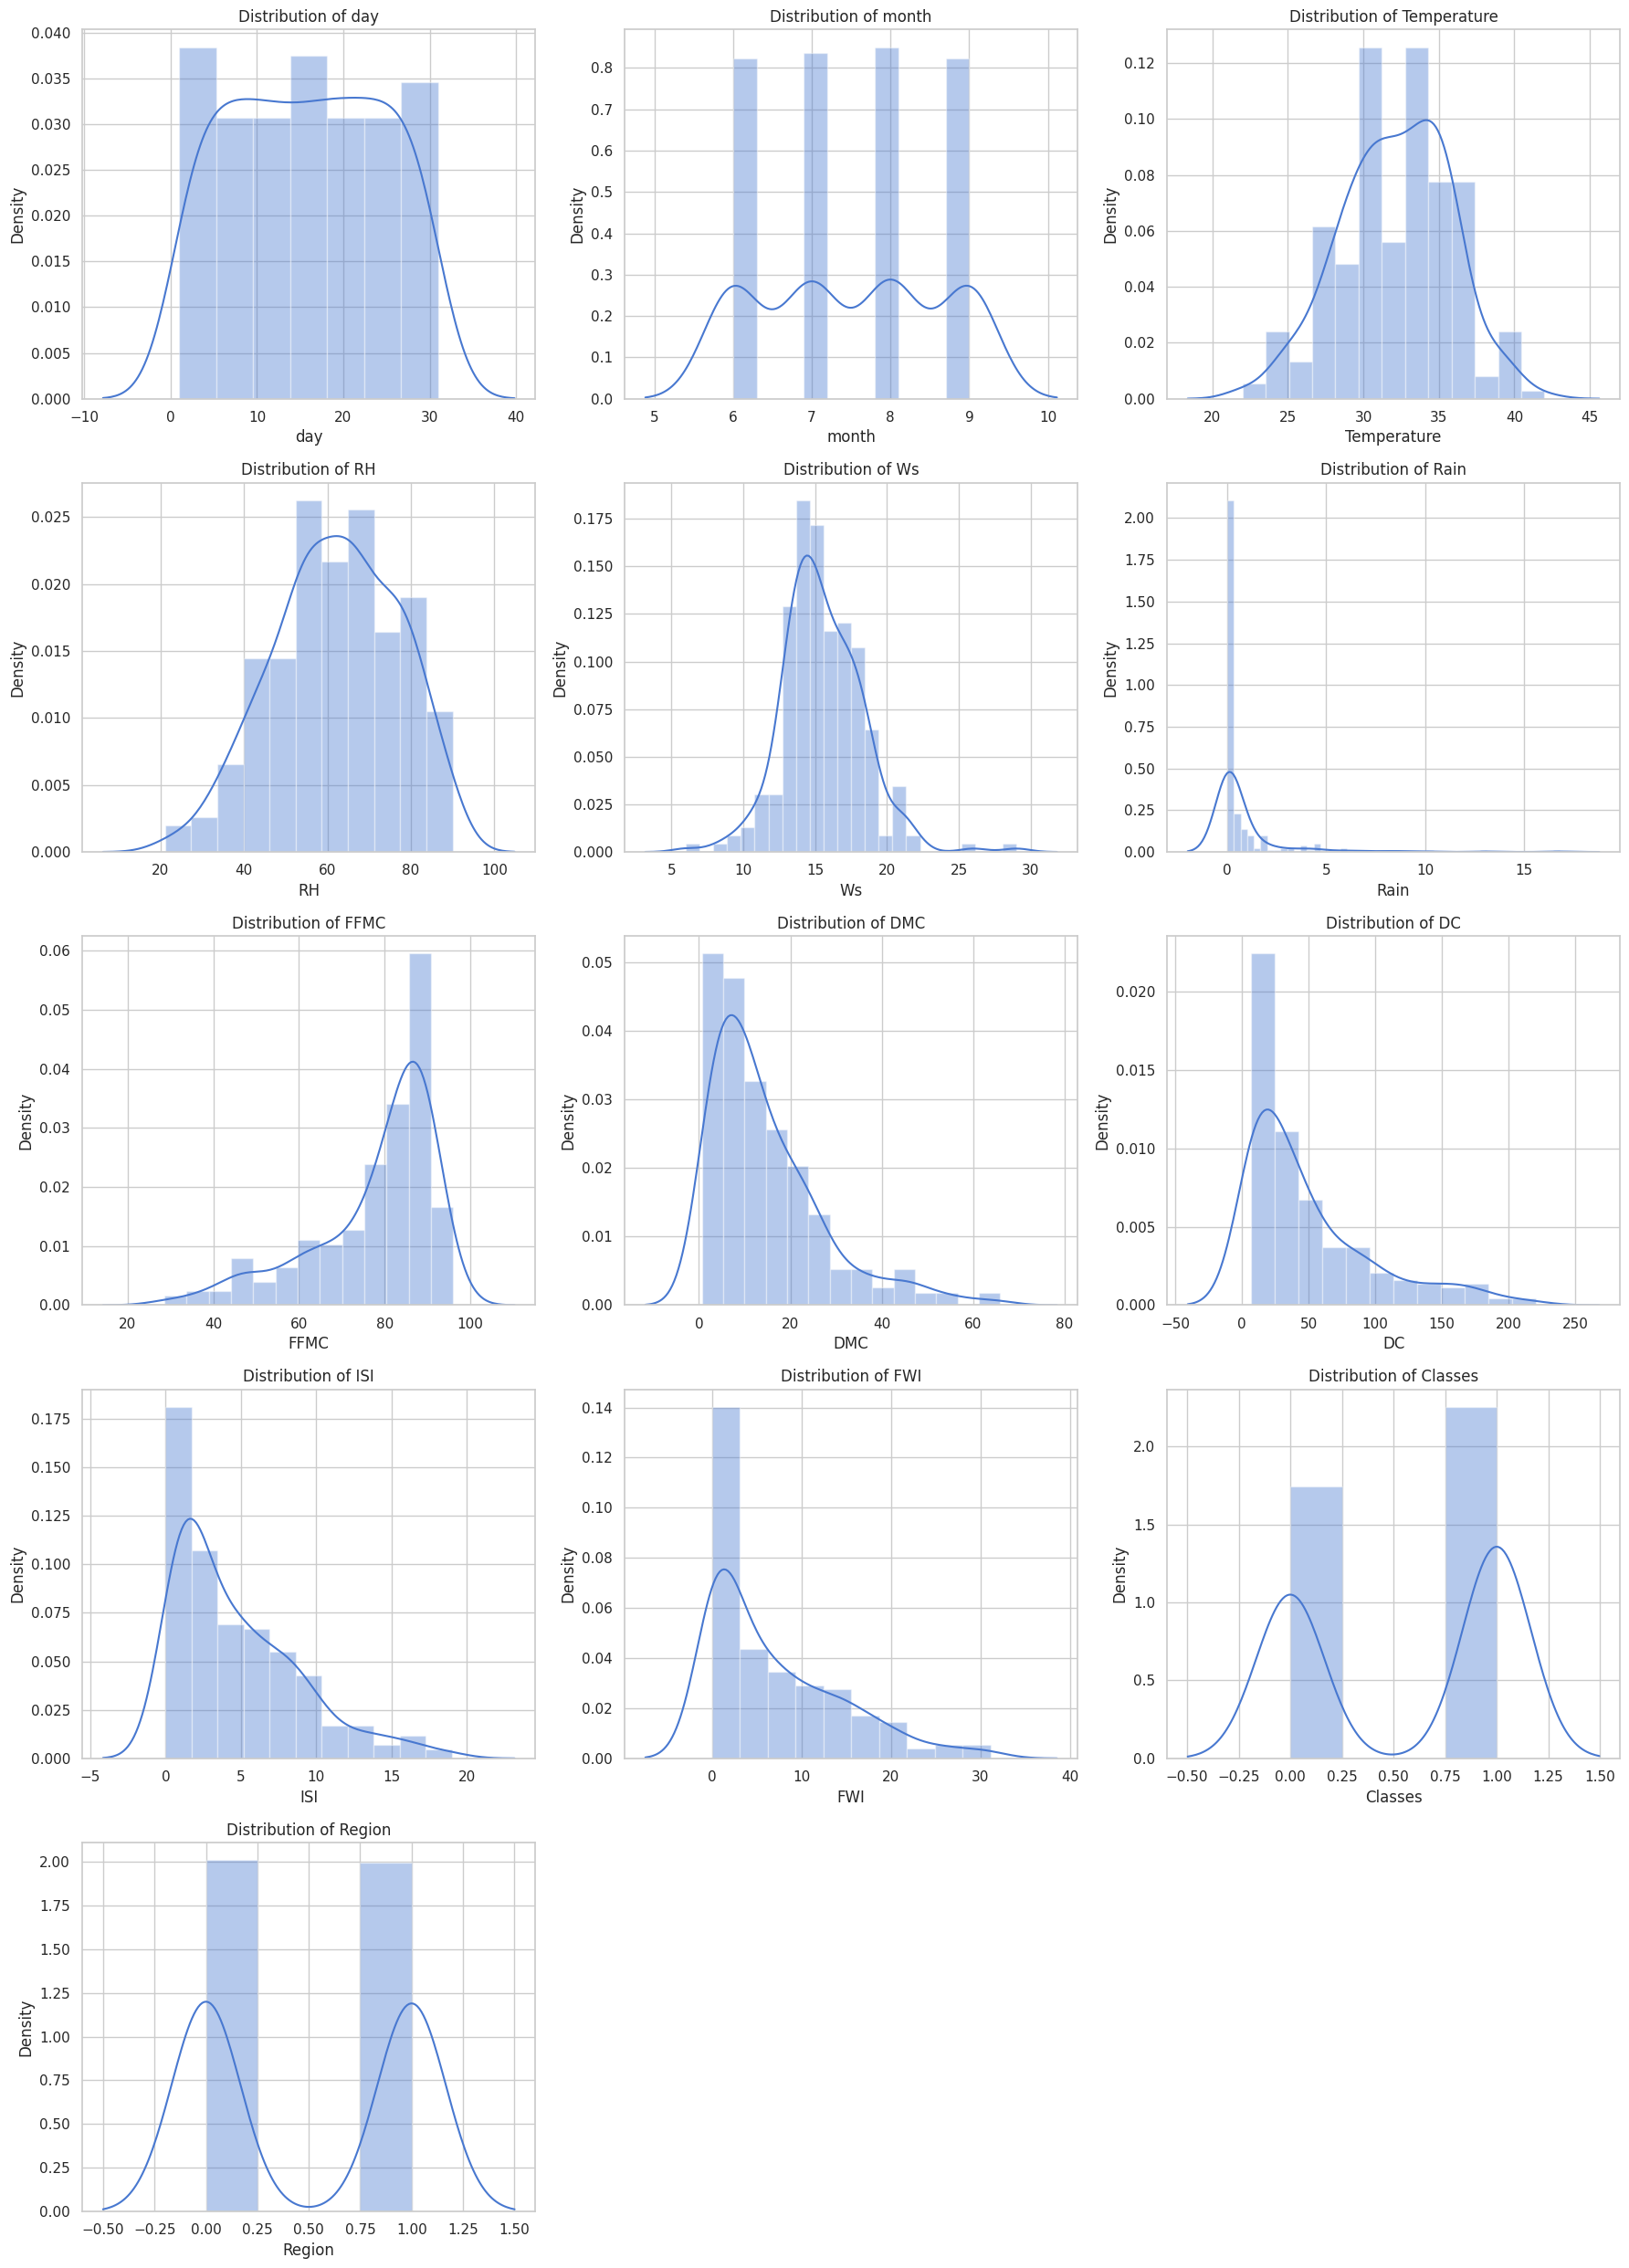

In [45]:
import math

n_cols = 3
n_rows = math.ceil(len(df.columns) / n_cols)  # Calculate the number of rows needed


fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Loop through the columns and create distribution plots
for i, column in enumerate(df.columns):
    sns.distplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Hide any remaining empty subplots (if total plots < rows * cols)
for i in range(len(df.columns), n_rows * n_cols):
    axes[i].axis('off')

# Automatically adjust spacing between plots
plt.tight_layout()
plt.show()



From the distributions, we can infer:

- Regarding dates, there are observations for every day of the month, but when we take a look at months, there are observations only from June to September.


- Temperature has a normal distribution, with most of the observations between 30 and 34.

- Relative humidity (RH) almost presents a normal distribution but is a bit skewed to the right with most observations close to 60%.

-  Wind speed (Ws) follows closely a normal distribution, with most observations in the range of 14–15 km/h.

- Rain has a distribution skewed to the left, mainly because most than half of the days there is not rain so the precipitation is equal to 0. Additionally, precipitations have an interval from 0 to 5, and precipitations beyond that point are not usual.

- Fine Fuel Moisture Code (FFMC) is skewed to the right with 90 as the value with the highest density.

- Duff Moisture Code (DMC) is skewed to the left, probably because most of the days the moisture is low, which supports the rain distribution.

- Drought Code (DC) is skewed to the left, which is an indication that the locations are not prone to droughts and have a have a higher risk of fires.

- Initial Spread Index (ISI) follows a similar distribution to DC which is also an indication that fires tend to not spread fast in early stages.

- Buildup Index (BUI) also follows closely the distributions of the previous features, which is an indication that the sources of fuel for fires are not widespread.

- Fire Weather Index (FWI) is also skewed to the left, giving that its calculation is based on the previous features.


In relation to the categorical variables, we observe that there are more observations with fires than with no-fires and we have the same number of observations between the 2 regions that have observations in our dataset.


Now we can take a look of the correlation between variables with a correlation matrix.

We observed that as we can see in the distributions, the variables that are directly used to calculate the FWI are highly correlated. For instance BUI is almost perfectly correlated with DMC and DC and because of this we are eliminating BUI from our dataframe.

There are other variables with high correlation but we are going to model them and use tools like regularization to improve our model.

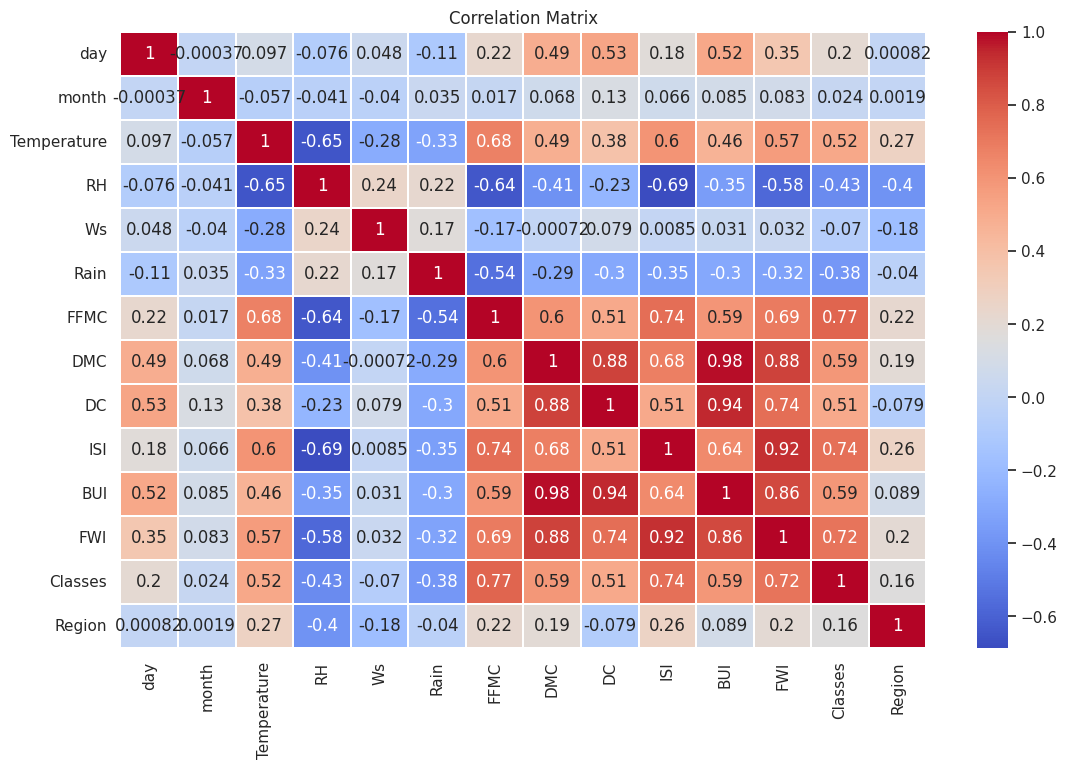

In [38]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.1, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

In [39]:
df.drop('BUI', axis=1, inplace=True)
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'FWI', 'Classes', 'Region'],
      dtype='object')

To get a visual perspective of the correlation we are lookin at in the correlation matrix between each feature and our dependet variable we are goin to plot scatterplots of each feature with the FWI column.

What we see is that the linear realtionship is stronger with the DMC, DC and ISI columns. However the linearily is not so noticiable with the other features.

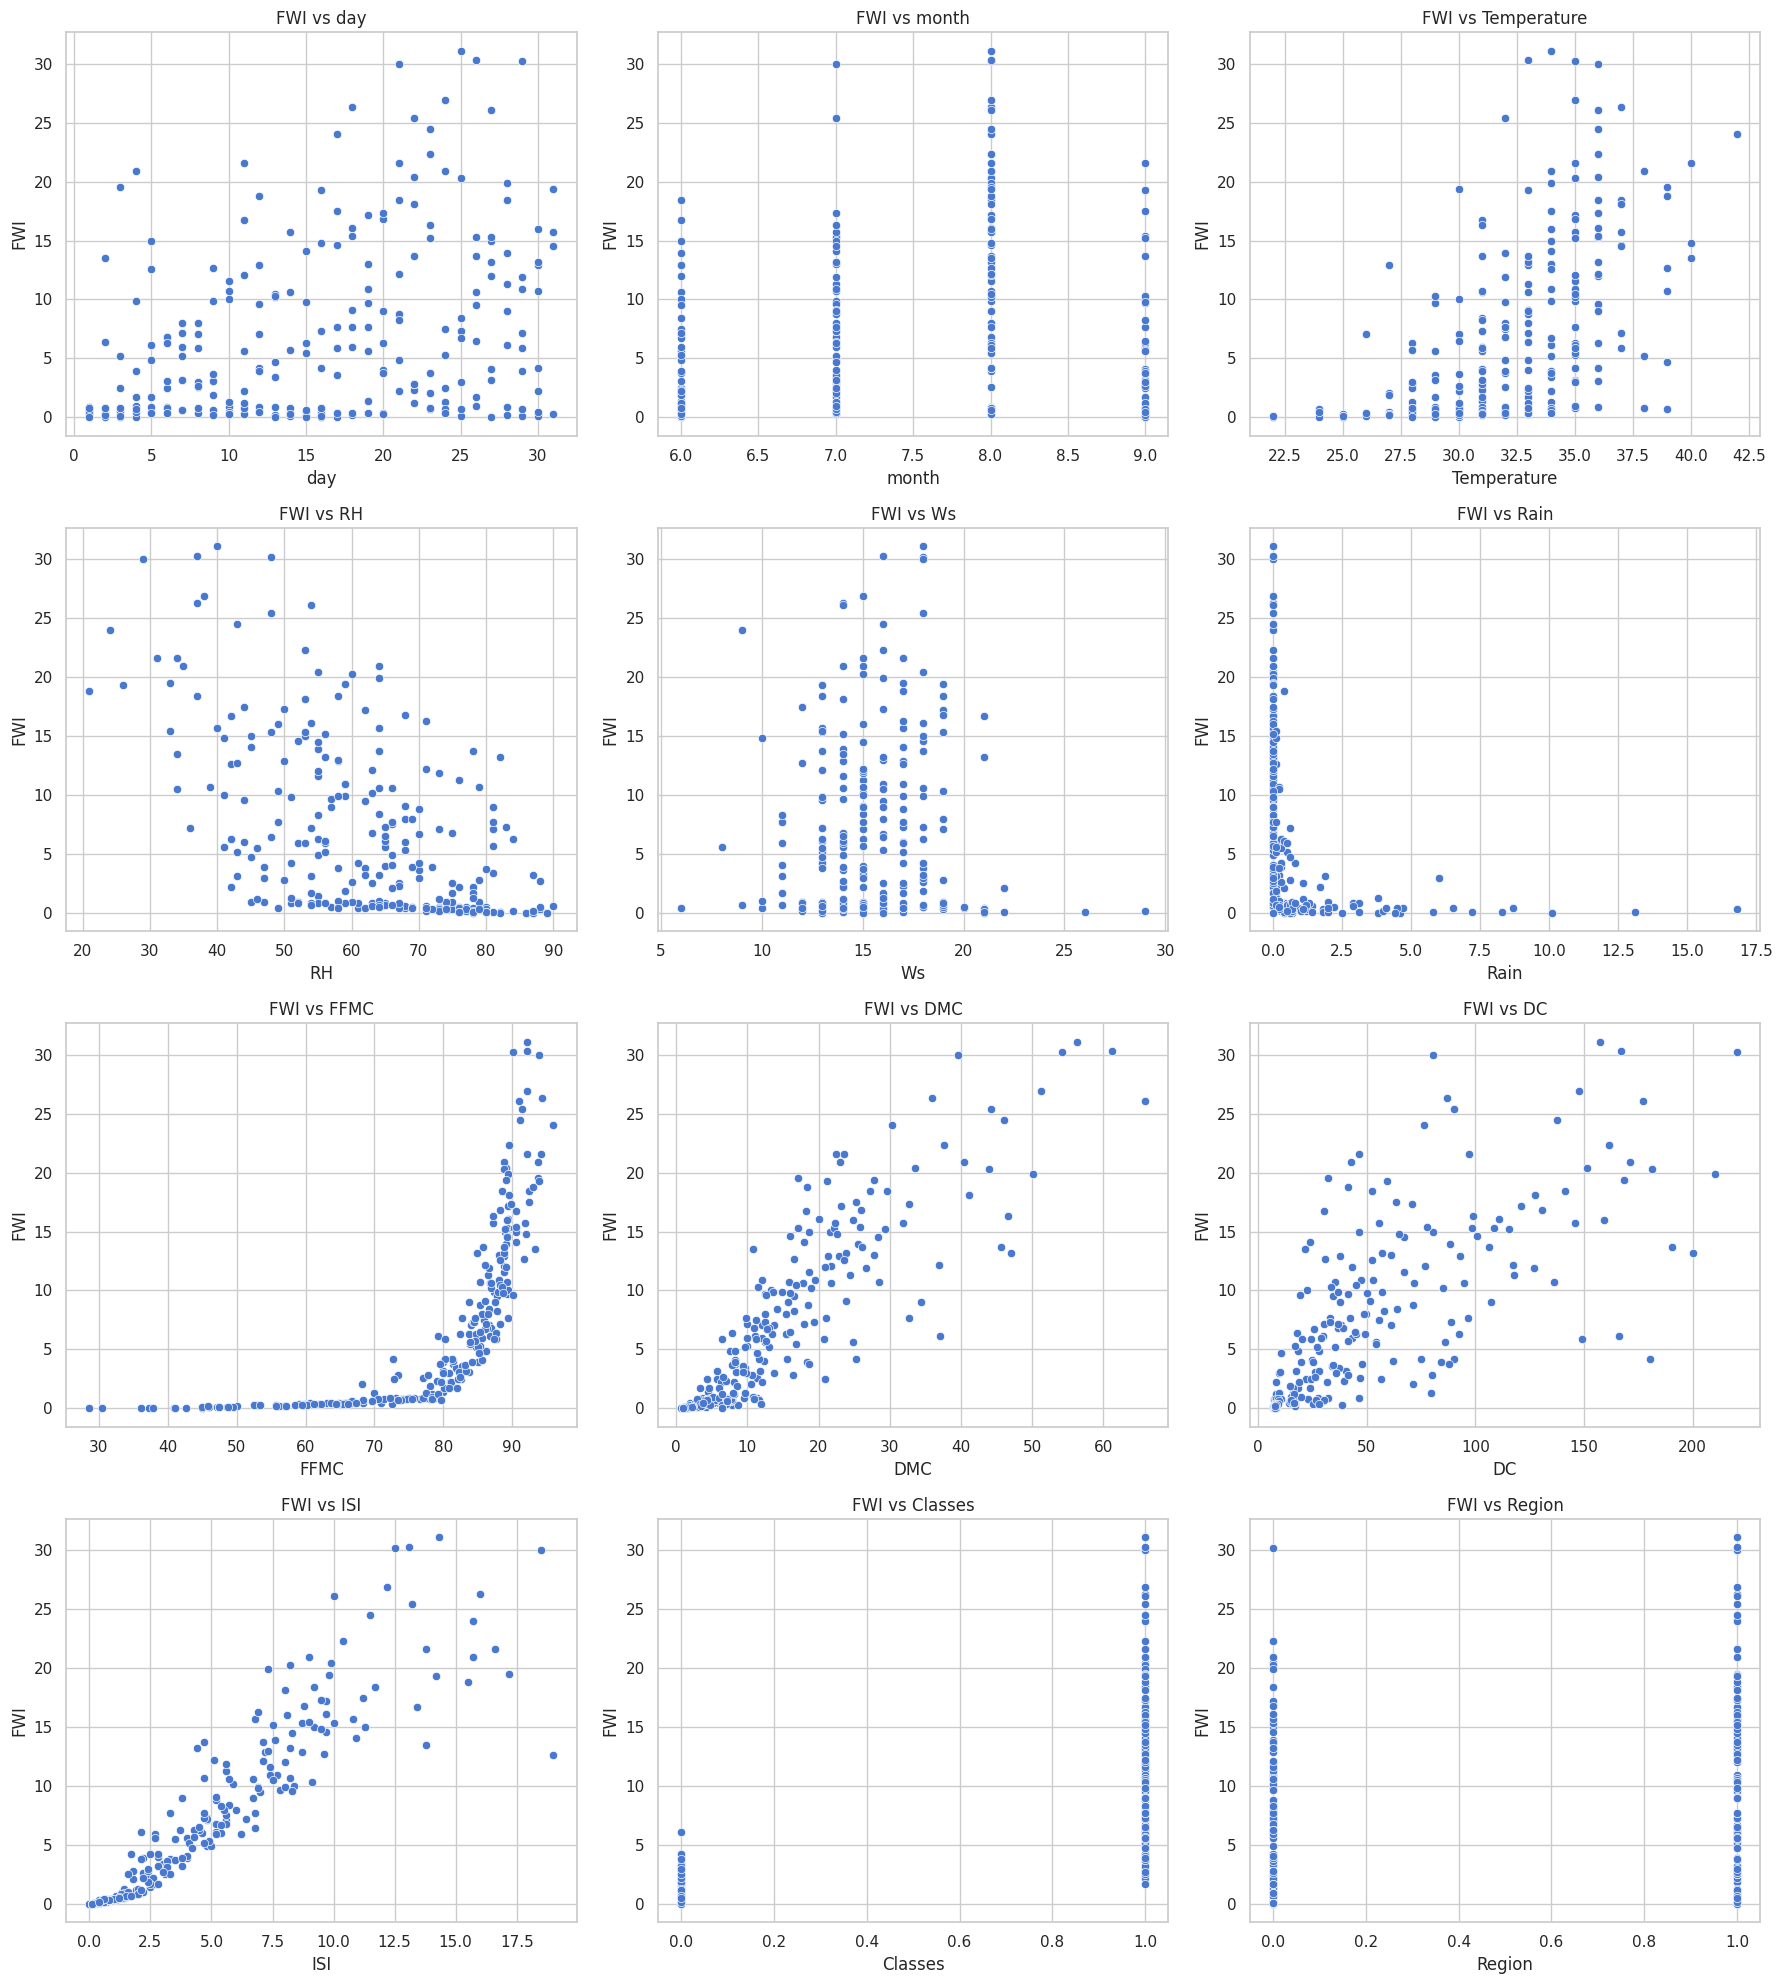

In [42]:
import math

columns = [col for col in df.columns if col != 'FWI']

n_cols = 3
n_rows = math.ceil(len(columns) / n_cols)  # Calculate the number of rows needed


fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through the columns and create scatter plots
for i, column in enumerate(columns):
    sns.scatterplot(data=df, x=column, y='FWI', ax=axes[i])
    axes[i].set_title(f'FWI vs {column}')

# Hide any remaining empty subplots (if total plots < rows * cols)
for i in range(len(columns), n_rows * n_cols):
    axes[i].axis('off')

# Automatically adjust spacing between plots
plt.tight_layout()
plt.show()


Lastly in the EDA is important to take a look to possible outliers, and for this purpose a boxplot is a good alternative.

What we see is that giving the 243 observations there is not a concentrated presence of outliers, apart from precipitation, but as explained before most of the days there are not rain and because of this most of the values are 0 which makes the inter quatal reange (IQR) a not really good alternative to use for outlier detection.

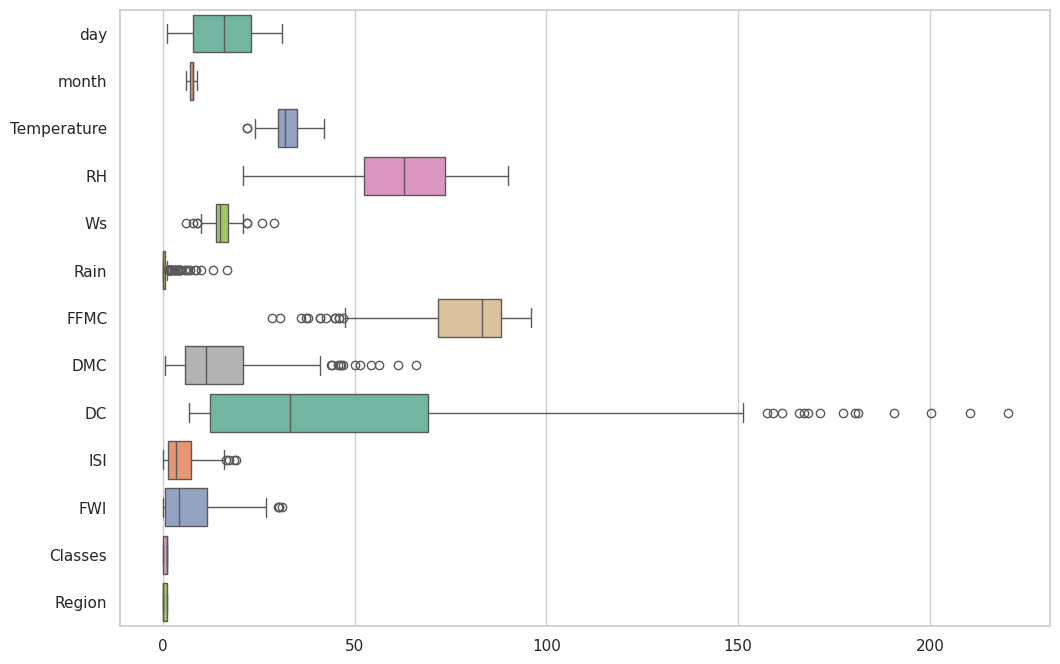

In [43]:
sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="Set2")

plt.show()

## Modeling

Now we are going to start with the modeling part, for this purpose we are going to:
1. Separate the independent and dependet features.
2. Split the data in traning and testing in a 80/20 ratio.
3. Create my polynomial features for polynomial regression.
3. Scale the training data.

In [47]:
# Importing required modules

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [48]:
# Feature separation

x = df.drop('FWI', axis=1)
y = df['FWI']

In [49]:
# Data split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
# Polynomial features creation

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [99]:
# Data scaling

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_poly_scaled = scaler.fit_transform(x_train_poly)
x_test_poly_scaled = scaler.transform(x_test_poly)

### Lineal regression

Now we are going to observe the performance of linear regression without regularization

In [82]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred_train = model.predict(x_train_scaled)
y_pred_test = model.predict(x_test_scaled)

print( "Performance metrics on linear regression model:")
print()
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print()
print( "Performance metrics on training data:")
print('R2 Score: ', r2_score(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_train, y_pred_train)))
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test)))

r2_lr_tr = r2_score(y_train, y_pred_train)
r2_lr_ts = r2_score(y_test, y_pred_test)

Performance metrics on linear regression model:

Coefficients:  [ 0.10057575  0.03113326 -0.0509998  -0.20288231 -0.077631    0.01264967
 -0.86639222  2.98086857  0.81190394  5.0623828   0.31768492 -0.21223454]
Intercept:  7.420103092783505

Performance metrics on training data:
R2 Score:  0.973655690379429
MSE:  1.598327135076065
MAE:  0.6804857421581169
Root Mean Squared Error:  0.986739930467714

Performance metrics on testing data:
R2 Score:  0.9765012997805252
MSE:  0.7122085107435607
MAE:  0.4947920842423371
Root Mean Squared Error:  0.9881808031835698


Now we are going to apply regularization (Ridge, Lasso and Elasticnet) to see if the metrics can be improved.

In [59]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

rd = Ridge()
ls = Lasso()
en = ElasticNet()

In [75]:
# Ridge regression model

rd.fit(x_train_scaled, y_train)

y_pred_train = rd.predict(x_train_scaled)
y_pred_test = rd.predict(x_test_scaled)

print( "Performance metrics on Ridge regression model:")
print()
print("Coefficients: ", rd.coef_)
print("Intercept: ", rd.intercept_)
print()
print( "Performance metrics on training data:")
print('R2 Score: ', r2_score(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_train, y_pred_train)))
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test)))
print('_'*100)

r2_rd_tr = r2_score(y_train, y_pred_train)
r2_rd_ts = r2_score(y_test, y_pred_test)

# Lasso regression model

ls.fit(x_train_scaled, y_train)

y_pred_train = rd.predict(x_train_scaled)
y_pred_test = rd.predict(x_test_scaled)

print( "Performance metrics on Lasso regression model:")
print()
print("Coefficients: ", ls.coef_)
print("Intercept: ", ls.intercept_)
print()
print( "Performance metrics on training data:")
print('R2 Score: ', r2_score(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_train, y_pred_train)))
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test)))
print('_'*100)

r2_ls_tr = r2_score(y_train, y_pred_train)
r2_ls_ts = r2_score(y_test, y_pred_test)

# ElasticNet regression model

en.fit(x_train_scaled, y_train)

y_pred_train = en.predict(x_train_scaled)
y_pred_test = en.predict(x_test_scaled)

print( "Performance metrics on ElasticNet regression model:")
print()
print("Coefficients: ", en.coef_)
print("Intercept: ", en.intercept_)
print()
print( "Performance metrics on training data:")
print('R2 Score: ', r2_score(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_train, y_pred_train)))
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test)))

r2_en_tr = r2_score(y_train, y_pred_train)
r2_en_ts = r2_score(y_test, y_pred_test)



Performance metrics on Ridge regression model:

Coefficients:  [ 0.10005651  0.03542434 -0.04695493 -0.23798994 -0.0614774   0.01468036
 -0.8317525   2.94609186  0.84536974  4.96751431  0.34349206 -0.19995524]
Intercept:  7.420103092783505

Performance metrics on training data:
R2 Score:  0.9736080676097331
MSE:  1.6012164408179375
MAE:  0.6900422692245213
Root Mean Squared Error:  0.9867157988041607

Performance metrics on testing data:
R2 Score:  0.9756259364437934
MSE:  0.7387393917110389
MAE:  0.508062892229016
Root Mean Squared Error:  0.9877377872916442
____________________________________________________________________________________________________
Performance metrics on Lasso regression model:

Coefficients:  [ 0.          0.          0.         -0.          0.         -0.
  0.          2.9737127   0.14295973  4.0637404   0.         -0.        ]
Intercept:  7.420103092783505

Performance metrics on training data:
R2 Score:  0.9736080676097331
MSE:  1.6012164408179375
MAE:  0

As we can see in the results we are getting R2 scores around 0.97 in training and testing in all the models except ElasticNet. In this case it can be the equal relationship between L1 and L2 in the ElasticNet what could be affecting the model, but we are going to see if with hyperparameter optimization the results can improve.

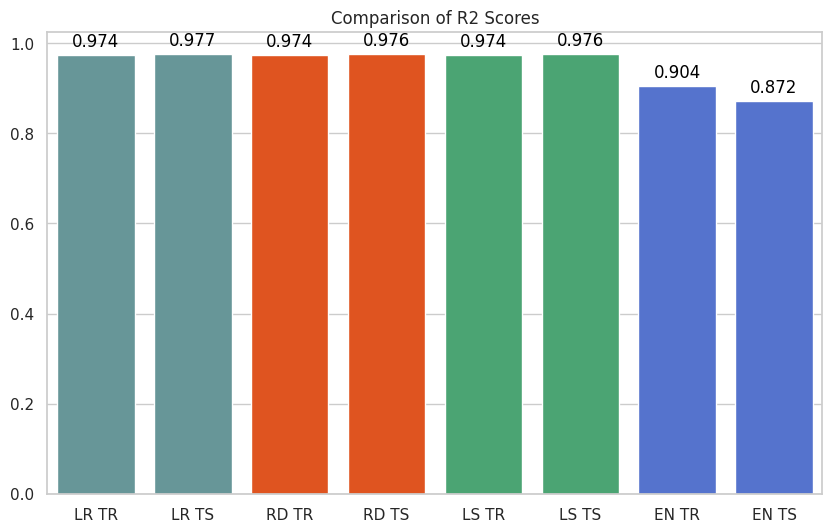

In [93]:
r2_scores = [r2_lr_tr, r2_lr_ts, r2_rd_tr, r2_rd_ts, r2_ls_tr, r2_ls_ts, r2_en_tr, r2_en_ts]

labels = ['LR TR', 'LR TS', 'RD TR', 'RD TS', 'LS TR', 'LS TS', 'EN TR', 'EN TS']

colors = ['cadetblue' if 'LR' in label else 'orangered' if 'RD' in label else 'mediumseagreen' if 'LS' in label else 'royalblue' for label in labels]

plt.figure(figsize=(10, 6))
plt.title('Comparison of R2 Scores')

barplot = sns.barplot(x=labels, y=r2_scores, palette=colors)

for i, score in enumerate(r2_scores):
    barplot.text(i, score + 0.01, round(score, 3), ha='center', va='bottom', fontsize=12, color='black')

plt.show()


Now we proceed with hyperparameter tuning and crossvalidation for Ridge, Lasso and ElasticNet.

We observe that there is a decrease of arounf 0.2 in he r2 score which is a mos accurate score of how the model is going to perform, giving that crossvalidation was performed and that this scores are the average of the 5 iterations. Inside the parameters of each model are include all the models we evaluated previously so that makes this metrics more reliable. Also we can see that in this case the performance of ElasticNet is not lower than ridge and lasso, which is another sign that crossvalidation is presenting a better view of the model evaluation.

In [103]:
# Grid parameters for all the models

param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid_elastic = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.3, 0.7, 0.9]}

# Model definition

lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()

# Hyperparameter tunning with crossvalitadion

grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2')
grid_elastic = GridSearchCV(elastic, param_grid_elastic, cv=5, scoring='r2')

# Model fitting

grid_ridge.fit(x_train_scaled, y_train)
grid_lasso.fit(x_train_scaled, y_train)
grid_elastic.fit(x_train_scaled, y_train)

# Best estimators

lasso_model = grid_lasso.best_estimator_
ridge_model = grid_ridge.best_estimator_
elastic_model = grid_elastic.best_estimator_

print(f"Best parameters for Ridge: {grid_ridge.best_params_}")
print(f"Best score for Ridge: {grid_ridge.best_score_}")
print()
print(f"Best parameters for Lasso: {grid_lasso.best_params_}")
print(f"Best score for Lasso: {grid_lasso.best_score_}")
print()
print(f"Best parameters for ElasticNet: {grid_elastic.best_params_}")
print(f"Best score for ElasticNet: {grid_elastic.best_score_}")

Best parameters for Ridge: {'alpha': 1}
Best score for Ridge: 0.9558358204772108

Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: 0.9561006702404045

Best parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.9}
Best score for ElasticNet: 0.9562747638430424


### Polynomial regression

Now we are going to evaluate Linear, Ridge, Lasso and Elasticnet as we do before but with polynomial features.

In [104]:
# Lineal regression

model = LinearRegression()
model.fit(x_train_poly_scaled, y_train)

y_pred_train = model.predict(x_train_poly_scaled)
y_pred_test = model.predict(x_test_poly_scaled)

print( "Performance metrics on linear regression model:")
print()
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print()
print( "Performance metrics on training data:")
print('R2 Score: ', r2_score(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_train, y_pred_train)))
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test)))
print('_'*100)

r2_lr_tr = r2_score(y_train, y_pred_train)
r2_lr_ts = r2_score(y_test, y_pred_test)

# Ridge regression model

rd.fit(x_train_poly_scaled, y_train)

y_pred_train = rd.predict(x_train_poly_scaled)
y_pred_test = rd.predict(x_test_poly_scaled)

print( "Performance metrics on Ridge regression model:")
print()
print("Coefficients: ", rd.coef_)
print("Intercept: ", rd.intercept_)
print()
print( "Performance metrics on training data:")
print('R2 Score: ', r2_score(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_train, y_pred_train)))
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test)))
print('_'*100)

r2_rd_tr = r2_score(y_train, y_pred_train)
r2_rd_ts = r2_score(y_test, y_pred_test)

# Lasso regression model

ls.fit(x_train_poly_scaled, y_train)

y_pred_train = rd.predict(x_train_poly_scaled)
y_pred_test = rd.predict(x_test_poly_scaled)

print( "Performance metrics on Lasso regression model:")
print()
print("Coefficients: ", ls.coef_)
print("Intercept: ", ls.intercept_)
print()
print( "Performance metrics on training data:")
print('R2 Score: ', r2_score(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_train, y_pred_train)))
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test)))
print('_'*100)

r2_ls_tr = r2_score(y_train, y_pred_train)
r2_ls_ts = r2_score(y_test, y_pred_test)

# ElasticNet regression model

en.fit(x_train_poly_scaled, y_train)

y_pred_train = en.predict(x_train_poly_scaled)
y_pred_test = en.predict(x_test_poly_scaled)

print( "Performance metrics on ElasticNet regression model:")
print()
print("Coefficients: ", en.coef_)
print("Intercept: ", en.intercept_)
print()
print( "Performance metrics on training data:")
print('R2 Score: ', r2_score(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('MAE: ', mean_absolute_error(y_train, y_pred_train))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_train, y_pred_train)))
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('MAE: ', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test)))

r2_en_tr = r2_score(y_train, y_pred_train)
r2_en_ts = r2_score(y_test, y_pred_test)


Performance metrics on linear regression model:

Coefficients:  [ 3.61857613e+12 -1.05647882e+00 -1.07779706e+00  2.19849795e+00
  1.34740086e+00  3.77393813e-01  2.00016271e+00  6.05418946e+00
 -6.58693203e+00  6.91792017e-01 -2.47490802e+01 -2.64486590e-01
 -6.78753773e-01  1.65243059e-01 -2.16502820e-01  1.27806195e-01
  9.76118944e-02  3.46802011e-01  6.53424015e-02  9.60203429e-01
 -2.39171542e+00  1.36677505e+00  4.23006194e-01 -2.48419964e-01
  1.24812213e-01  3.69284640e-01  1.18878599e+00  3.73014772e-01
 -2.88199607e-01  3.87400776e-01 -4.05050045e-01 -3.68929991e+00
  2.92843765e+00  1.74287560e+00 -4.05162769e-01  5.45863746e-01
 -8.36127367e-01 -1.01110773e+00 -3.22297565e-01  1.04309773e+00
 -3.08589890e+00  4.18438316e+00 -4.13423519e+00  1.34698619e+00
 -3.34813816e-01 -1.76660708e-01 -2.73714152e-01 -2.74979004e-01
 -3.35627948e+00 -9.57553408e-02  2.80976105e+00 -1.47203560e+00
 -9.78307969e-01  5.54919966e-02 -5.54682099e-02  3.52262873e-01
  7.59395241e-01 -3.073146

As we can see in the results, there is an increment of R2 score from 0.97 to 0.99 in Linear, Ridge and Lasso regression using way more coefficients than the ones used when our features were linear, which means that these modeles are more complex due to the polynimic variables.

We also can perfom crossvalidation and hyperparameter tunning in our polynomic regression as follows:

In [105]:
# Grid parameters for all the models

param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid_elastic = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.3, 0.7, 0.9]}

# Model definition

lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()

# Hyperparameter tunning with crossvalitadion

grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2')
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='r2')
grid_elastic = GridSearchCV(elastic, param_grid_elastic, cv=5, scoring='r2')

# Model fitting

grid_ridge.fit(x_train_poly_scaled, y_train)
grid_lasso.fit(x_train_poly_scaled, y_train)
grid_elastic.fit(x_train_poly_scaled, y_train)

# Best estimators

lasso_model_poly = grid_lasso.best_estimator_
ridge_model_poly = grid_ridge.best_estimator_
elastic_model_poly = grid_elastic.best_estimator_

print(f"Best parameters for Ridge: {grid_ridge.best_params_}")
print(f"Best score for Ridge: {grid_ridge.best_score_}")
print()
print(f"Best parameters for Lasso: {grid_lasso.best_params_}")
print(f"Best score for Lasso: {grid_lasso.best_score_}")
print()
print(f"Best parameters for ElasticNet: {grid_elastic.best_params_}")
print(f"Best score for ElasticNet: {grid_elastic.best_score_}")

Best parameters for Ridge: {'alpha': 0.001}
Best score for Ridge: 0.9825658771875073

Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: 0.9794847316077732

Best parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.9}
Best score for ElasticNet: 0.9792074567106788


Here happened the same as we see before, the R2 score decreases because the effect of the crossvalidation. As before in this case the three models have almos an identical performance.

## Model selection and testing

With all the models we have been developing we are going to choose the lasso model from crossvalidation with linear data for the following reasons:

- Even tough the polynomial models have better R2 scores the difference is not higher than 0.2 and this 0.2 comes with a lot more coefficients that make model more complex and requires to perform more calculations.
- We can see that 6 coeffcients are reduced to 0 which reduces the complexity of the model getting the same performance. Because the model relies in less features is going to be more computing efficient than other models.

In [110]:
y_pred_test_ls = lasso_model.predict(x_test_scaled)

print("Performance metrics on crossvalidation Lasso model on  testing data:")
print("Coefficients: ", lasso_model.coef_)
print("Intercept: ", lasso_model.intercept_)
print()
print("Performance metrics on testing data:")
print('R2 Score: ', r2_score(y_test, y_pred_test_ls))
print('MSE: ', mean_squared_error(y_test, y_pred_test_ls))
print('MAE: ', mean_absolute_error(y_test, y_pred_test_ls))
print('Root Mean Squared Error: ', np.sqrt(r2_score(y_test, y_pred_test_ls)))

Performance metrics on crossvalidation Lasso model on  testing data:
Coefficients:  [ 1.34909671e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.22739130e-01  2.87366646e+00
  8.33482277e-01  4.85913381e+00  0.00000000e+00 -4.94578692e-02]
Intercept:  7.420103092783505

Performance metrics on testing data:
R2 Score:  0.9699346130760703
MSE:  0.9112344191818247
MAE:  0.6059596911637055
Root Mean Squared Error:  0.9848525844389455


### Pickel files generation and testing on unseen data

Now that we choose our models is time to export the pickle files and testing the data on unseen data:

In [117]:
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(lasso_model, open('FWI_model.pkl', 'wb'))

In [118]:
unknown_data = {
    'day': [7, 20, 29, 15, 11, 8, 29, 21, 7, 26],
    'month': [8, 8, 8, 8, 9, 6, 9, 9, 9, 8],
    'Temperature': [22.41, 41.40, 38.65, 26.25, 25.64, 25.67, 28.08, 32.50, 30.64, 27.82],
    'RH': [63.22, 30.63, 41.16, 46.28, 52.47, 75.18, 34.78, 56.48, 61.88, 24.21],
    'Ws': [19.97, 9.92, 7.50, 27.82, 28.21, 24.59, 13.01, 8.25, 21.74, 16.12],
    'Rain': [2.05, 8.32, 0.58, 15.28, 4.35, 11.13, 5.24, 8.74, 9.18, 3.11],
    'FFMC': [93.95, 80.84, 91.92, 88.91, 68.90, 90.73, 34.56, 41.81, 31.65, 50.53],
    'DMC': [26.04, 18.39, 54.73, 23.96, 19.02, 36.08, 9.89, 53.00, 5.56, 65.05],
    'DC': [171.77, 49.33, 8.08, 181.00, 157.81, 162.54, 171.57, 22.71, 83.43, 31.64],
    'ISI': [16.40, 11.84, 6.29, 1.21, 5.91, 6.18, 13.86, 12.11, 16.86, 8.97],
    'Classes': [0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    'Region': [0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
}

unknown_df = pd.DataFrame(unknown_data)

In [120]:
unknown_df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
0,7,8,22.41,63.22,19.97,2.05,93.95,26.04,171.77,16.40,0,0
1,20,8,41.40,30.63,9.92,8.32,80.84,18.39,49.33,11.84,0,0
2,29,8,38.65,41.16,7.50,0.58,91.92,54.73,8.08,6.29,1,0
3,15,8,26.25,46.28,27.82,15.28,88.91,23.96,181.00,1.21,0,0
4,11,9,25.64,52.47,28.21,4.35,68.90,19.02,157.81,5.91,0,0
5,8,6,25.67,75.18,24.59,11.13,90.73,36.08,162.54,6.18,0,1
6,29,9,28.08,34.78,13.01,5.24,34.56,9.89,171.57,13.86,1,1
7,21,9,32.50,56.48,8.25,8.74,41.81,53.00,22.71,12.11,0,1
8,7,9,30.64,61.88,21.74,9.18,31.65,5.56,83.43,16.86,0,0
9,26,8,27.82,24.21,16.12,3.11,50.53,65.05,31.64,8.97,1,0


In [119]:
sc = pickle.load(open('scaler.pkl', 'rb'))
model = pickle.load(open('FWI_model.pkl', 'rb'))

df_sc = sc.transform(unknown_df)
model.predict(df_sc)

array([24.5030622 , 15.85247737, 16.74760978,  7.20202335, 11.32671485,
       15.02015582, 18.9325532 , 23.84753675, 20.01899524, 23.0808635 ])

Even when the data is created and not from real observation we can see that the values of FWI are between the correct range.

As we see in the coefficients we observ that higher values of DMC and ISI are related with higher FWI values.